## Housing Data-Price Prediction
- In the dataset we have various features which are associated with the proce of a house.
- In reality, a real estate agent predicts price of a house based on features of house. These include: `Lot size`, `Neighbourhood`, `Number of bedrooms`, `Swimming pool`, etc. 

- Based on past data of house sells price and features, we build a model to predict price of a house which will help a realtor to predict the price of a house.

### Importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [2]:
df = pd.read_csv("C:\\Users\\Ashish Gupta\\Desktop\\Python\\DATA copy\\Ames_Housing_Data.csv")

### Feature discription
- The dataset comes with a file attached which contains the description of each feature column.
- It explains the meaning of each feature variable and the values it contain

In [3]:
with open('C:\\Users\\Ashish Gupta\\Desktop\\Python\\DATA copy\\Ames_Housing_Feature_Description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [4]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

- The info function tells us that there are total 2930 datapoints with 81 columns.
- Datatype on each column is either integer or float or object. 
- It also tells us that there are some missing values in some feature column.

In [6]:
#df.describe().transpose()

## Feature Engineering
### Dealing with Outliers.

In [7]:
df.corr()['SalePrice'].sort_values()[-5:-1]

Garage Area     0.640401
Garage Cars     0.647877
Gr Liv Area     0.706780
Overall Qual    0.799262
Name: SalePrice, dtype: float64

- `Overall Qual`and `Gr Liv Area` are highly correlated with SalePrice.
- Let's try to plot Sale pirce vs these features.

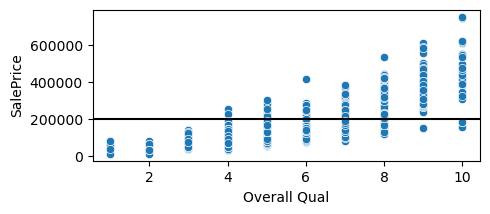

In [8]:
plt.figure(figsize=(5,2), dpi=100)
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df);
plt.axhline(y=200000, color='black')


- Plotting relationship between `Price` and `Overall Quality` we can see that there are two houses whose overall quality is above 8 but are undervalued.
- We want to build a model which do not predict undervalued prices as it mighr upset the owner.
- Lets identify these houses below.

In [9]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


- Turns out there are 4 houses which were sold at undervalued prices.
- Lets further check the relation of house `Price` with `Living area`.

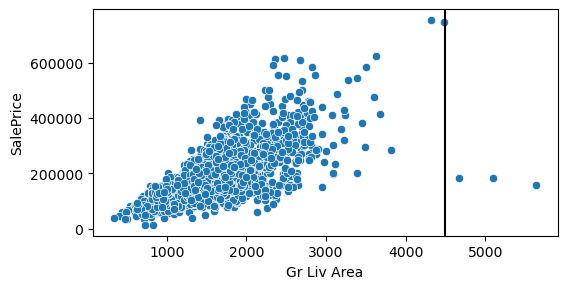

In [10]:
plt.figure(figsize=(6,3), dpi=100)
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)
plt.axvline(x=4500, color='black')

- In the scatterplot above we see there are three houses in particular which have been undervalued.
- We will check if any of these houses matches with the houses we found from previous plot.

In [11]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


- These three houses are the same houses which we found from the previous plot.
- As these houses are outlier we will simply drop them from dataset.

In [12]:
ind_drop = df[(df['Overall Qual']>8) & (df['SalePrice']<200000)].index

In [13]:
df = df.drop(ind_drop,axis=0)

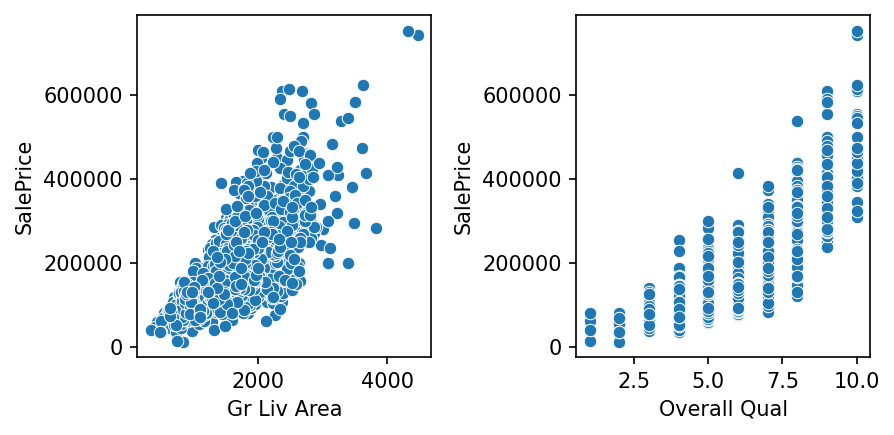

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=150, figsize=(6,3))
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df, ax=ax1)
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df, ax=ax2);
plt.tight_layout()

- As can be seen in the plot above the dataset doesnot contain any outliers.
- We can proceed towards taking into account for missing values.
- But first lets drop the column which contains ID associated with each house. 

In [15]:
df = df.drop('PID',axis=1)

### Dealing with missing values

We will check the percentage of missing values in each column feature.

In [16]:
df.isnull().sum()*100/len(df)

MS SubClass        0.000000
MS Zoning          0.000000
Lot Frontage      16.712235
Lot Area           0.000000
Street             0.000000
                    ...    
Mo Sold            0.000000
Yr Sold            0.000000
Sale Type          0.000000
Sale Condition     0.000000
SalePrice          0.000000
Length: 80, dtype: float64

- We will define a `Helper Function` to check for missing values after we do some `Feature Engineering`.<br>
- It involves:
    - Dropping the row containing missing value
    - Dropping the enitre column.
    - Filling the missing value using other features.

In [17]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [18]:
percent_nan = percent_missing(df)

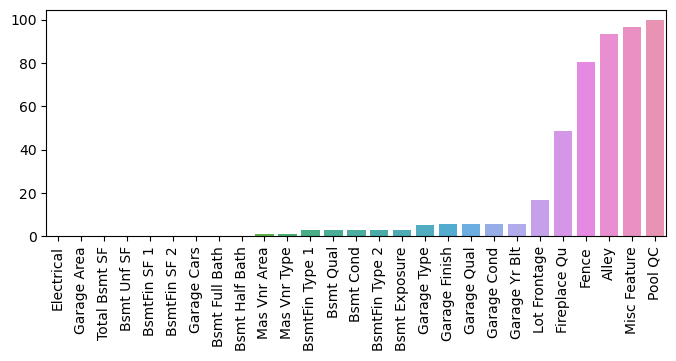

In [19]:
plt.figure(figsize=(8,3), dpi=100)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

- We can categorise the columns with missing values into `three categorys`.
    - Columns which have more than 50% values missing.
    - Columns which has missing values between 50% to 10%.
    - Columns which has missing values below 10%.

Lets deal with columns which has less than 1% values missing.

(0.0, 1.0)

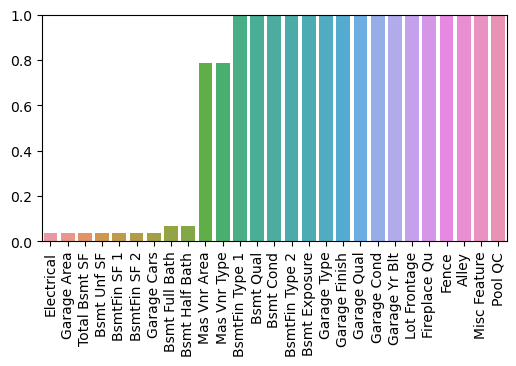

In [20]:
plt.figure(figsize=(6,3), dpi=100)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Setting 1% Threshold
plt.ylim(0,1)

In [21]:
percent_nan[percent_nan < 1]

Electrical        0.034176
Garage Area       0.034176
Total Bsmt SF     0.034176
Bsmt Unf SF       0.034176
BsmtFin SF 1      0.034176
BsmtFin SF 2      0.034176
Garage Cars       0.034176
Bsmt Full Bath    0.068353
Bsmt Half Bath    0.068353
Mas Vnr Area      0.786056
Mas Vnr Type      0.786056
dtype: float64

- Seems like there are some common types of features whose values are missing. 
- Let's check for `Basement` type column.

In [22]:
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [23]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


- We we refer to the description of these types of columns it can be stated that `no value` means the `feature is not available` in the houese. 
- Therefore, we should fill the values with either `none` or `0`, depending on datatype of the feature. 

In [24]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [25]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

- Now, we check back the missing value with the `helper function` we defined above.

In [26]:
percent_nan = percent_missing(df)
percent_nan

Electrical        0.034176
Garage Cars       0.034176
Garage Area       0.034176
Mas Vnr Type      0.786056
Mas Vnr Area      0.786056
Garage Type       5.365687
Garage Yr Blt     5.434040
Garage Finish     5.434040
Garage Qual       5.434040
Garage Cond       5.434040
Lot Frontage     16.712235
Fireplace Qu     48.598770
Fence            80.451128
Alley            93.233083
Misc Feature     96.411483
Pool QC          99.589884
dtype: float64

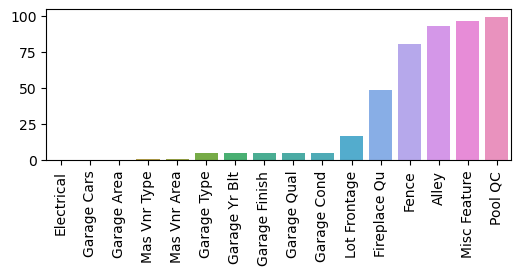

In [27]:
plt.figure(figsize=(6,2), dpi=100)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

- We drop few rows as they only make up 0.3% of the datasets. 

In [28]:
df = df.dropna(axis=0,subset= ['Electrical','Garage Cars'])

In [29]:
percent_nan = percent_missing(df)

(0.0, 1.0)

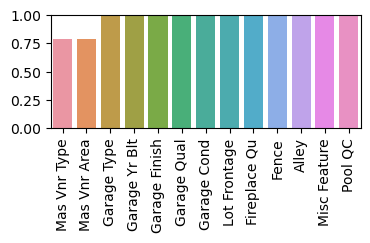

In [30]:
plt.figure(figsize=(4,1.5), dpi=100)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

- We now deal with features of type `Masonry veneer` and `Garage`.
- After checking from description we can treat these features as we treated `Basement` as the values means the same thing.

In [31]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [32]:
percent_nan = percent_missing(df)

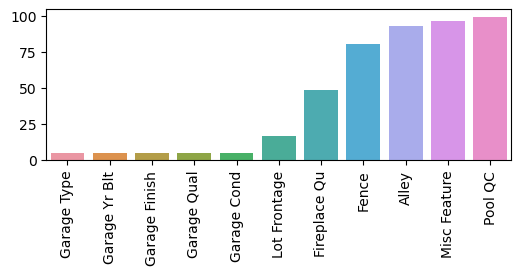

In [33]:
plt.figure(figsize=(6,2), dpi=100)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [34]:
df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2925,Detchd,Unf,TA,TA
2926,Attchd,Unf,TA,TA
2927,NaN,NaN,NaN,NaN
2928,Attchd,RFn,TA,TA


In [35]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [36]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [37]:
percent_nan = percent_missing(df)

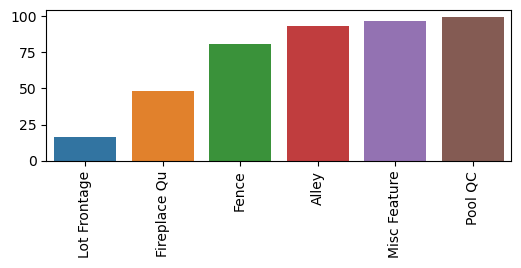

In [38]:
plt.figure(figsize=(6,2), dpi=100)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [39]:
percent_nan.index

Index(['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature',
       'Pool QC'],
      dtype='object')

- We drop columns which has more than 50% missing values.

In [40]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [41]:
percent_nan = percent_missing(df)

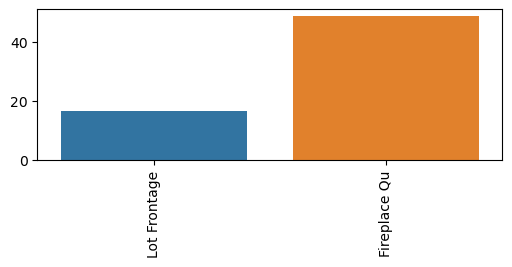

In [42]:
plt.figure(figsize=(6,2), dpi=100)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

- No values in `Fireplace` feature means the place doesnot have any fireplace. Since it is a object type, we fill the missing value by `none`

In [43]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

In [44]:
percent_nan = percent_missing(df)

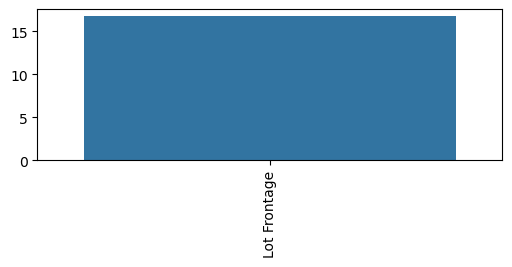

In [45]:
plt.figure(figsize=(6,2), dpi=100)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

- Let's try to fill the missing value in `Lot Front` by the average value of front lot area in the `neighbour`. 
- By doing this we are assuming that each neighbourhood have similar size of front lot areas.
- I did not knew how to solve this problem at first hand. So I refered to a online source on [dataquest](https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group).

In [46]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [47]:
percent_nan = percent_missing(df)

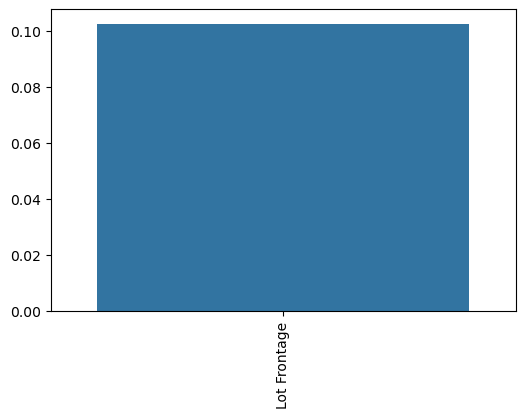

In [48]:
plt.figure(dpi=100)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

- We now just fill `0` for the missing values in `Lot Front Area`.

In [49]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [50]:
percent_nan = percent_missing(df)

In [51]:
percent_nan

Series([], dtype: float64)

### Dealing with categorical data.
1. We first convert `MS SubClass` in to string as it is categorical feature but has been entered as numeric.
2. Separate numeric features from categorical features.
3. Create dummies for categorical features.
4. Concatenate the dummy variables with numerical to get our final dataframe.

In [52]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [53]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [54]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [55]:
final_df = pd.concat([df_nums,df_objs],axis=1)

In [56]:
final_df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


In [57]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2924 entries, 0 to 2929
Columns: 274 entries, Lot Frontage to Sale Condition_Partial
dtypes: float64(11), int64(25), uint8(238)
memory usage: 1.5 MB


## Exploratory Data Analysis.

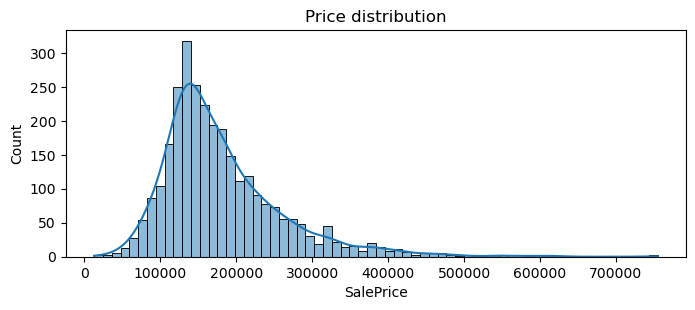

In [58]:
plt.figure(figsize=(8,3), dpi=100)
sns.histplot(df["SalePrice"], kde=True);
plt.title('Price distribution');

- The distribution plot shows that maximum number of houses belongs in the range of `100000` to `250000` range.
- But there are few number of houses which are priced above `300000` mark going upto `800000` mark.

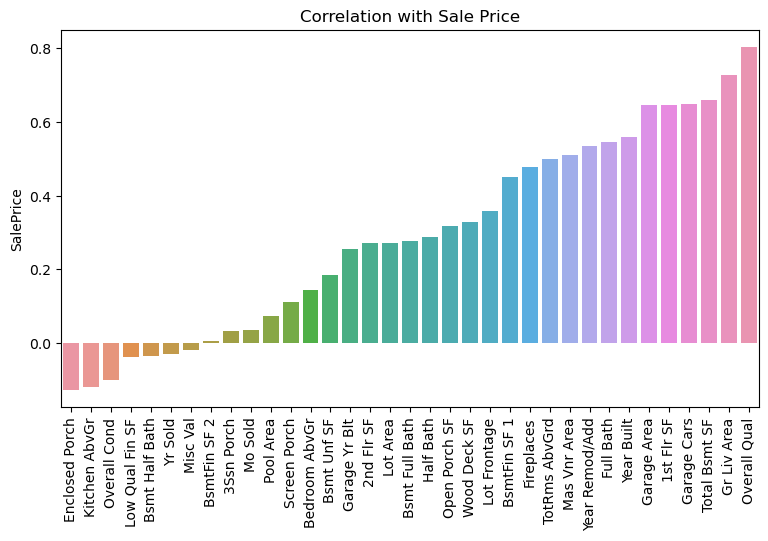

In [59]:
plt.figure(figsize=(9,5), dpi=100)
plt.xticks(rotation=90)
plt.title('Correlation with Sale Price')
sns.barplot(y=df.corr()['SalePrice'].sort_values()[:-1], 
            x=df.corr()['SalePrice'].sort_values()[:-1].index);

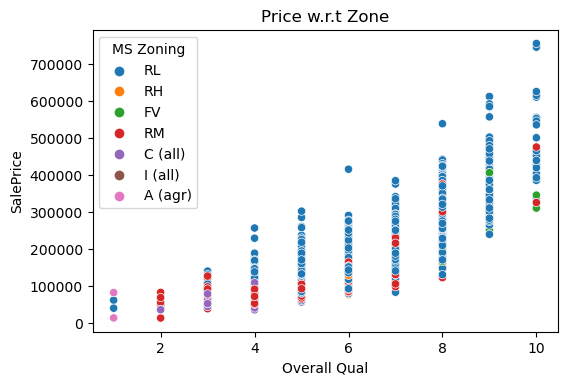

In [60]:
plt.figure(figsize=(6,4), dpi=100)
sns.scatterplot(y=df.SalePrice, x=df['Overall Qual'], data=df, hue='MS Zoning');
plt.title('Price w.r.t Zone');

- The Prices of houses in low density residential areas and floating village residence are higher.
- Medium density residential areas have a wide range of prices and Quality.
- Pricesof houses in agricultural and commerical areas range from low to medium.

## Model Building
1. Separate `Independent` and `Dependent` variables into `X` and `y` respectively.
2. Divide our dataset into `training set` and `test set`.
3. `Scale` independent variable to `normalize` any difference in unit.

In [61]:
X = final_df.drop('SalePrice',axis=1)
y = final_df['SalePrice']

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2924 entries, 0 to 2929
Columns: 273 entries, Lot Frontage to Sale Condition_Partial
dtypes: float64(11), int64(24), uint8(238)
memory usage: 1.5 MB


### Importing necessary libraries.

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR 

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [65]:
scaler = StandardScaler()

In [66]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Helper function to run each model.
1. Takes model along with train test data.
2. Fit train data to the model.
3. Predict on test data.
4. Compute `Mean Square Mean` and `Root Mean Squared Error`.
5. Also compute average house price to compare with MAE.
6. We compare errors across variety of models to select a model which works best for the dataset.

In [67]:
def run_model(model, X_train, y_train, X_test, y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    #Predict model
    preds = model.predict(X_test)
    #Get metrics
    mae=mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    #Print metrics 
    print(f'Mean Price : {np.mean(y)}')
    print(f'MAE : {mae}')
    print(f'RMSE : {rmse}')
    print(f'Percentage deviation from mean value : {np.round(100*mae/np.mean(y),2)}')
    

### Linear Regression Model
- It is the most simple model.
- It determines the value of independent variable(Price) w.r.t a linear combination of dependent variables.
- Variables are linearly combined by a weight attached to each variable which is called paramenter.
- Each parameter measures the impact of one independent variable on dpendent variable. 

In [68]:
linear_model=LinearRegression()

In [69]:
run_model(linear_model, scaled_X_train, y_train, scaled_X_test, y_test)

Mean Price : 180826.0762653899
MAE : 15730.827304033231
RMSE : 22668.09390664254
Percentage deviation from mean value : 8.7


- Mean absolute error is about 8.7% of average price of houses. 
- If a realtor was to predict the price of a house the model in its current state would predict price which can be undervalued or overvalued by 15700 dollars.
- We try to improve the linear regression model by using `Regularization`.

In [70]:
len(linear_model.coef_)

273

####  Regularization in Linear Model
- It is an inbuit function to apply `Regularization` on a regression model.
- Regularization method adds an extra term to the error term which is minimized while performing a regression. 
- In ElasticNet the extra term added is combination of `Lasso` and `Ridge` regularization.
- The effect of regularization is that it ignores unnecessary indpendent variables to as to avoid overfitting the model. It also helps in model interpretability.

In [71]:
base_elastic_model = ElasticNet()

In [72]:
param_grid={
    'alpha':[0.1,1,5,10],
    'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]
}

In [73]:
grid_model=GridSearchCV(base_elastic_model, param_grid)

In [74]:
run_model(grid_model, scaled_X_train,y_train, scaled_X_test, y_test)

C:\Users\Ashish Gupta\anaconda3\envs\udemy\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175405151828.0029, tolerance: 1300416469.8434181
  positive)
C:\Users\Ashish Gupta\anaconda3\envs\udemy\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162546591977.05658, tolerance: 1285358363.896675
  positive)
C:\Users\Ashish Gupta\anaconda3\envs\udemy\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132383919993.33728, tolerance: 1360119039.2048001
  positive)
C:\Users\Ashish Gupta\anaconda3\envs\udemy\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did 

C:\Users\Ashish Gupta\anaconda3\envs\udemy\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118075072156.42786, tolerance: 1339636749.8316252
  positive)
C:\Users\Ashish Gupta\anaconda3\envs\udemy\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47277639502.47656, tolerance: 1300416469.8434181
  positive)
C:\Users\Ashish Gupta\anaconda3\envs\udemy\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106067916738.5943, tolerance: 1285358363.896675
  positive)
C:\Users\Ashish Gupta\anaconda3\envs\udemy\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did n

Mean Price : 180826.0762653899
MAE : 15586.265222969483
RMSE : 22766.661355822547
Percentage deviation from mean value : 8.62


In [75]:
grid_model.best_params_

{'alpha': 1, 'l1_ratio': 0.99}

In [76]:
grid_model.best_score_

0.9178491023772757

- Although the model explains the variation of sales prices by 91%, we do not see any significant difference in MAE as compared to simple linear regression model.
- Infact, we see an increase of root mean absolute error.
- The model shows prediction based on Lasso regulatization with 1 as coefficent.
- Therefore, it can be concluded that regularization has no effect on model results for our dataset. 

### Polynomial Model
- It tries to improve a model by adding polynomial combination of varius independent variable to independent variable.
- It increases model complexity.

In [77]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_X = polynomial_converter.fit_transform(X)
poly_X_train, poly_X_test, poly_y_train, poly_y_test = train_test_split(poly_X,
                                                    y, test_size=0.10, random_state=101)

In [78]:
poly_model=LinearRegression()

In [79]:
run_model(poly_model, poly_X_train, poly_y_train, poly_X_test, poly_y_test)

Mean Price : 180826.0762653899
MAE : 204409.32502129424
RMSE : 391332.5477370116
Percentage deviation from mean value : 113.04


- The polynomial model does a very poor job for out dataset.
- It can be expected as the dataset contains huge number of independent variables, which naturally makes the model complex.
- By applying polynomial method we only increase model complexity which results excessively overfitting and therefore large errors. 

### Random Forest Regression
- It is a tree based model.
- It predicts the outcome by forming a number of trees which are split into branches.
- The node represents a particular feature selected at random from the dataset. We can specify the maximum number of rows to be used to form a particular tree by `max_feature` parameter.
- The number of branches can be changed by using `max_dept` argument. 
- Increasing  number of branches increases risk for overfiting the model.
- The outcome is the average of outcomes from number of trees. To determine number of trees to be formed we can change `n_estimators` parameter.

In [80]:
model=RandomForestRegressor()

In [81]:
param_grid = {'n_estimators':[100,125,150,200],
             'max_depth': [10,20,25],
              'max_features': [25,30,35,40,45]
             }

In [82]:
grid_model=GridSearchCV(model, param_grid)

In [83]:
run_model(grid_model, scaled_X_train, y_train, scaled_X_test, y_test)

Mean Price : 180826.0762653899
MAE : 16540.928335386543
RMSE : 28020.08792400529
Percentage deviation from mean value : 9.15


In [84]:
grid_model.best_params_

{'max_depth': 20, 'max_features': 45, 'n_estimators': 150}

- Optimal parameters selected by GridSearhCV.

In [85]:
grid_model.best_score_

0.911755201768657

- Random Forest method doesnot perform better than Linear Regression model. 
- The errors are slightly more than errors from linear regression model.
- Although random forest model explains about 91% variation in prices.

### Support Vector Regression
- A Support Vector Machine is an algorith based model which tries to classify data by forming hyperplane in (n-1) dimensions.
- A Support Vector Regression is a SVM model used for continous variable prediction by predicting a point on a hyperplane.

In [86]:
svr_model=LinearSVR()

In [87]:
param_grid={'C':[0,0.001,0.01,0.1,0.5,1],
           'epsilon':[0,0.01,0.2,0.5,1,2]}

In [88]:
grid_model=GridSearchCV(svr_model, param_grid)

In [89]:
run_model(grid_model, scaled_X_train, y_train, scaled_X_test, y_test)

C:\Users\Ashish Gupta\anaconda3\envs\udemy\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ashish Gupta\anaconda3\envs\udemy\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ashish Gupta\anaconda3\envs\udemy\lib\site-packages\sklearn\svm\_classes.py", line 422, in fit
    epsilon=self.epsilon, sample_weight=sample_weight)
  File "C:\Users\Ashish Gupta\anaconda3\envs\udemy\lib\site-packages\sklearn\svm\_base.py", line 969, in _fit_liblinear
    epsilon, sample_weight)
  File "sklearn\svm\_liblinear.pyx", line 52, in sklearn.svm._liblinear.train_wrap
ValueError: b'C <= 0'

  FitFailedWarning)
C:\Users\Ashish Gupta\anaconda3\envs\udemy\lib\site-packages\sklearn\model_selection\_validation.py:5

C:\Users\Ashish Gupta\anaconda3\envs\udemy\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ashish Gupta\anaconda3\envs\udemy\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ashish Gupta\anaconda3\envs\udemy\lib\site-packages\sklearn\svm\_classes.py", line 422, in fit
    epsilon=self.epsilon, sample_weight=sample_weight)
  File "C:\Users\Ashish Gupta\anaconda3\envs\udemy\lib\site-packages\sklearn\svm\_base.py", line 969, in _fit_liblinear
    epsilon, sample_weight)
  File "sklearn\svm\_liblinear.pyx", line 52, in sklearn.svm._liblinear.train_wrap
ValueError: b'C <= 0'

  FitFailedWarning)
C:\Users\Ashish Gupta\anaconda3\envs\udemy\lib\site-packages\sklearn\model_selection\_validation.py:5

C:\Users\Ashish Gupta\anaconda3\envs\udemy\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Ashish Gupta\anaconda3\envs\udemy\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ashish Gupta\anaconda3\envs\udemy\lib\site-packages\sklearn\svm\_classes.py", line 422, in fit
    epsilon=self.epsilon, sample_weight=sample_weight)
  File "C:\Users\Ashish Gupta\anaconda3\envs\udemy\lib\site-packages\sklearn\svm\_base.py", line 969, in _fit_liblinear
    epsilon, sample_weight)
  File "sklearn\svm\_liblinear.pyx", line 52, in sklearn.svm._liblinear.train_wrap
ValueError: b'C <= 0'

  FitFailedWarning)


Mean Price : 180826.0762653899
MAE : 184929.1092150171
RMSE : 205049.31805285768
Percentage deviation from mean value : 102.27


In [90]:
grid_model.best_params_

{'C': 1, 'epsilon': 0.01}

- The model is not a good predictor as it yields large errors as compared to Linear Regression.

## Model Selection

#### Based on analysis of errors from various model we can say that Linear Model is the best among the class of model tested for the dataset.<b>
#### Weather the model can be used to predict sale price of a house depends on domain knowledge and market condition for houses.<b>
#### What we can infer is that Linear Regression is the best model to predict the sale prices of houses.
#### A realtor can predict the price of a house given the features and adjust according the their experience and condition to quote a desirable price.